# Machine learning with Tree based models 

In this notebook I will delve into all things to do with creating machine learning work flows with tree based models. 

I will look at a regression problems and classification problems and I will intorduce the datasets as I go along 

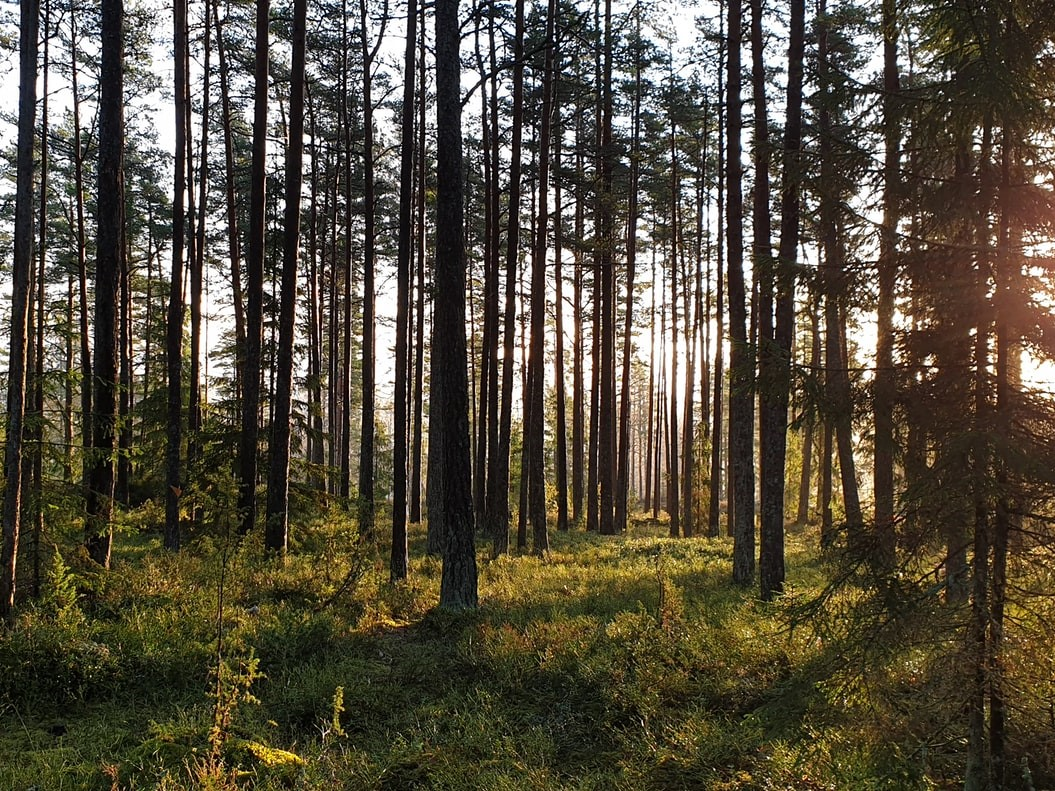


# 1.) Simple Classification Problem - utilising a decision tree 

I'll start by looking at a simple classifcation model working with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository,https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. In this model I will be look to predict whether a patient has a malignant tumor or benign tumor based upon just two features about the patient. 

In [7]:
import pandas as pd

cancer_data = pd.read_csv(r'C:\Users\Adam\Desktop\Personal\Python Syntax\Python Input Files\cancer_data.txt', header=0) 

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer_data.set_index('id')

random_seed=1

label_map = {'B':0,'M':1}

cancer_data['diagnosis']= cancer_data['diagnosis'].map(label_map)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state = random_seed)

print("Features sample")
print(cancer_data.loc[:5,['radius_mean','concave points_mean']])

print("and corresponding Labels where 1 equotes to a malignent tumour and 0 equals a benign tumour")
print(cancer_data.loc[:5,'diagnosis'])

#identify the features and labels 
X = cancer_data.loc[:,['radius_mean','concave points_mean']].values
y=cancer_data.loc[:,'diagnosis'].values

y.reshape(-1,1)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_seed)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels of the first 5 data rows
y_pred = dt.predict(X_test)

""" Evaluating the classification tree performance """
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("\n\n" + "Decision Tree Test set accuracy: {:.2f}".format(acc))

Features sample
   radius_mean  concave points_mean
0        17.99              0.14710
1        20.57              0.07017
2        19.69              0.12790
3        11.42              0.10520
4        20.29              0.10430
5        12.45              0.08089
and corresponding Labels where 1 equotes to a malignent tumour and 0 equals a benign tumour
0    1
1    1
2    1
3    1
4    1
5    1
Name: diagnosis, dtype: int64


Test set accuracy: 0.89


## Results
Training a decision tree classifier on 80% of the data and then test in on the rest we get a preditive accuracy score of 89%! 

How does a decsision tree make predictions though and how would it compare to a logisitic regression ? 

# 1b.) Decision Tree vs Logisitic Regression 

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions using these regions to assign predictions. In a 2d space this is easy to visualise and why we have started with just two features.


LogReg Test set accuracy: 0.88

Decision Tree Test set accuracy: 0.89


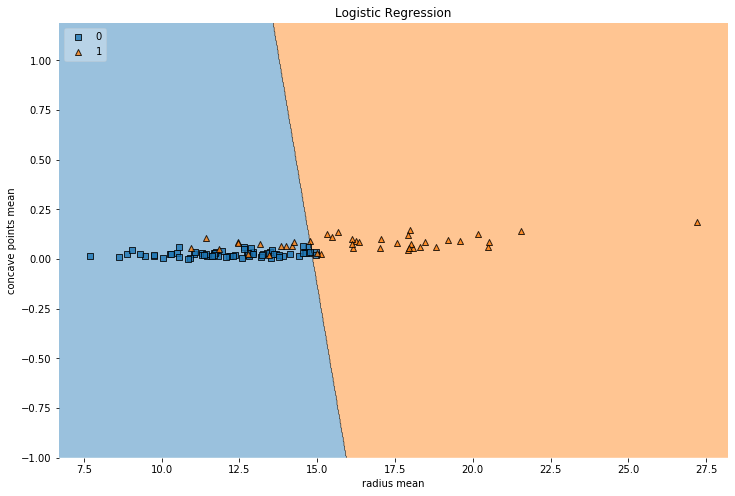

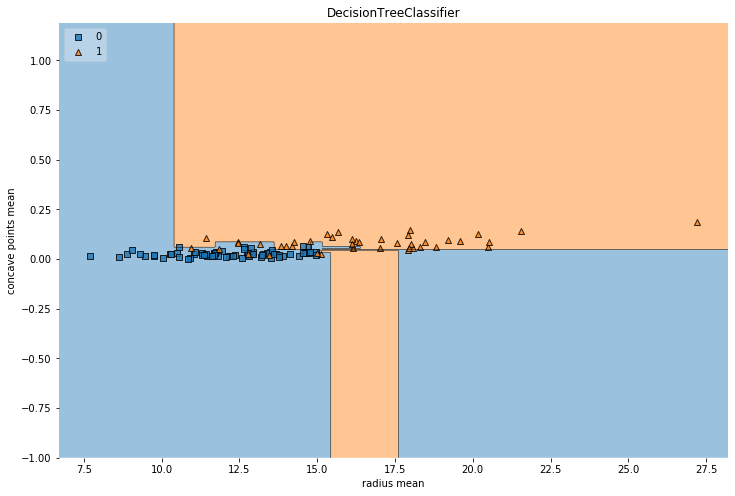

In [9]:
import matplotlib.pyplot as plt
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression
from mlxtend.plotting import plot_decision_regions

# Instatiate logreg
logreg = LogisticRegression(random_state= random_seed)

# Fit logreg to the training set
logreg_model = logreg.fit(X_train, y_train)

# Review the decision regions of the two classifiers

fig1, ax = plt.subplots(figsize=(12,8))
plot_decision_regions(X_test,y_test, clf=logreg,  legend=2)
ax.set_xlabel('radius mean')
ax.set_ylabel('concave points mean')
ax.set_title('Logistic Regression')

fig2, ax = plt.subplots(figsize=(12,8))
plot_decision_regions(X_test,y_test, clf=dt,  legend=2)
ax.set_xlabel('radius mean')
ax.set_ylabel('concave points mean')
ax.set_title('DecisionTreeClassifier')


# Predict test set labels
y_pred_logreg = logreg_model.predict(X_test)

# Compute test set accuracy  
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("LogReg Test set accuracy: {:.2f}".format(acc_logreg))
print("\n" + "Decision Tree Test set accuracy: {:.2f}".format(acc))


## Results

As can be seen the the Decision Tree classifier has extra flexibility in dividing the deicion space allowing it to deal with non linear relationships better than the logistic regression model and this has proved to provide a higher accuracy score for this example

# 2.) Simple Regression Problem - utilising a decision tree 

In this code, I will train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset, from https://www.kaggle.com/uciml/autompg-dataset using all the six available features.

I'll start by doing some expoloratory data analysis to get some intial thoughts on which regression algorithmn may work best.

As discussed linear regression only works well when features are all linearly proportional to the labels however here you can see that they are not 
therefore at first look we would expect a tree regressor to interpret the data better """

Car_mpg_data = pd.read_csv(r'C:\Users\Adam\Desktop\Personal\Python Syntax\Python Input Files\car_mpg_data.txt', header=0) 

""" doing exploratory analysis to begin with helps us identify which regression algorithmn will work best for the data """

""" linear regression only works well when features are all linearly proportional to the labels however here ou can see that they are not 
therefore at first look we would expect a tree regressor to interpret the data better """

print('Example of the data - the "label" is the mpg column and the rest are features'+'\n')

print(Car_mpg_data.head())

fig1, ax = plt.subplots(figsize=(12,8))

ax.scatter(Car_mpg_data.displ,Car_mpg_data.mpg)
ax.set_xlabel('Engine displacement')
ax.set_ylabel('mpg')
ax.set_title('Engine displacement vs mpg')

fig2, ax = plt.subplots(figsize=(12,8))

ax.scatter(Car_mpg_data.hp,Car_mpg_data.mpg)
ax.set_xlabel('horse power')
ax.set_ylabel('mpg')
ax.set_title('horse power vs mpg')

fig3, ax = plt.subplots(figsize=(12,8))

ax.scatter(Car_mpg_data.weight,Car_mpg_data.mpg)
ax.set_xlabel('weight')
ax.set_ylabel('mpg')
ax.set_title('car weight vs mpg')


## Result
As discussed linear regression only works well when features are all linearly proportional to the labels however here you can see that they are not 
therefore at first look we would expect a tree regressor to interpret the data better

# 2.) Simple Regression Problem - fitting a Decision Tree and LogReg

As this is  aregression problem I will evaluate the test set performance of DT and LogReg using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels.

The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [21]:
"""
Need to convert category variables into dummy variables so that thay can be used in the machine learning algo  
"""
# Create dummy variables: df_region
origin = pd.get_dummies(Car_mpg_data.origin)

Car_mpg_data = Car_mpg_data.drop('origin',axis=1)

Car_mpg_data = pd.concat( [Car_mpg_data,origin], axis=1)


#identify the features and labels 
X = Car_mpg_data.iloc[:,1:].values
y=Car_mpg_data.iloc[:,0].values

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)


""" fit tree regressor """

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,       # It can also be described as the length of the longest path from the tree root to a leaf. The root node is considered to have a depth of 0
                           min_samples_leaf=0.13,      #this means atleast 13% of the data should be in each leaf
                           random_state=random_seed)

# Fit dt to the training set
tree_model=dt.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred_test = tree_model.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred_test)

# Compute rmse_dt
rmse_dt_test = mse_dt**(1/2)

# Print rmse_dt
print("Decision Tree test set RMSE: {:.2f}".format(rmse_dt_test))


""" fit linear regressor  """

# Import linear regressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit the linear regressor
lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)
# Compute rmse_lr
rmse_lr_test = mse_lr**(1/2)

# Print rmse_lr
print('\n' + 'Linear Regression test set RMSE: {:.2f}'.format(rmse_lr_test))


Decision Tree test set RMSE: 4.37

Linear Regression test set RMSE: 5.10


## Result

As suspected from the EDA the linear regression fits the data worse then the regression tree

# 2b.) Evaluating the bias and variance of a regression tree model

This time we are going to establish a new tree regressor with max depth 4 and min samples 26% (a less complex model) and get to grips with how a fitted model can have bias and variance utilising cross validation analysis to do so

In [22]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
# Instantiate a DecisionTreeRegressor dt
dt_new = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)


# Import necessary modules
from sklearn.model_selection import cross_val_score

# Fit dt to the training set
tree_model_new = dt_new.fit(X_train, y_train)

# Compute y_pred on the training set
y_pred_train = tree_model_new.predict(X_train)

RMSE_Train = MSE(y_train,y_pred_train)**(1/2)

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt_new, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error',         # when fitting the model on each cross validation aim to reduce the mean squared error
                                  n_jobs=-1)                                # utilise all availbale CPU's

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('Regression Tree Cross Validation RMSE: {:.2f}'.format(RMSE_CV))
# Print rmse_dt_train
print('Regression Tree training set RMSE: {:.2f}'.format(RMSE_Train))

CV RMSE: 5.14
Regression Tree training set RMSE: 5.15


## Result
Having just fit a new regression tree and performed cross validation analysis I will diagnose whether the regression tree I've trained contains a bias or a variance problem.

To do this I am going to create a variable called baseline_RMSE which corresponds to the root mean-squared error achieved by a regression-tree trained utilising just 1 feature the (the engine displacement column)

Baseline_RMSE will serve as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does my decision tree classifier suffer from a high bias or a high variance problem?

In [25]:
#identify the features and labels of the baseline model
X_base = Car_mpg_data.iloc[:,1].values.reshape(-1,1)
y_base =Car_mpg_data.iloc[:,0].values.reshape(-1,1)

# Create train and test sets
X_trainbase, X_testbase, y_trainbase, y_testbase = train_test_split(X_base, y_base, test_size = 0.3, random_state=3)

base_model = dt_new.fit(X_trainbase, y_trainbase)
ybase_pred = base_model.predict(X_trainbase)

RMSE_base = MSE(ybase_pred,y_trainbase)**(1/2)

print('Baseline RMSE: {:.2f}'.format(RMSE_base))
# Print RMSE_CV
print('Regression Tree Cross Validation RMSE: {:.2f}'.format(RMSE_CV))
# Print rmse_dt_train
print('Regression Tree training set RMSE: {:.2f}'.format(RMSE_Train))


Baseline RMSE: 4.30
Regression Tree Cross Validation RMSE: 5.14
Regression Tree training set RMSE: 5.15


## Results Continued 

What we can see is that my decision tree classifier suffers from underfitting due to us reducing the complexity of the model 
at the start as the training error and the validation error are greater than the base error which also means the model has high bias.

The model doesn't have high variance as the training set error and the CV error are very similar

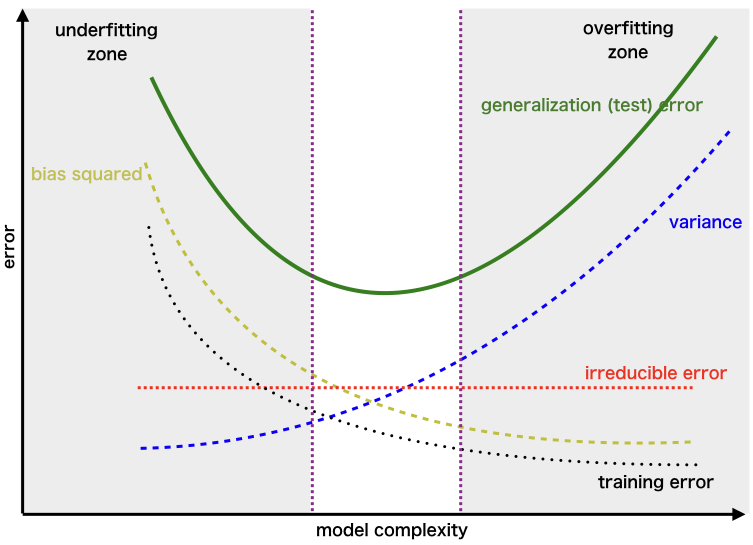

*What is bias?
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

*What is variance?
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.


# 3.) Creating an ensemble workflow - Voting Classifier 

In the following code I'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository, https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset.

I'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all of the features present in the dataset. 

A voting classifeir ensemble works by fitting multiple models to some data and then assigns predictions based upon whish outcomes were voted for most out of the models fitted. EG. if some features were show to 3 models and 2 out of the 3 models predicted the outcome should be a 1 and the other model predicted a 0 the overall prediction would be a 1. 

Ensembles aim to add another layer of improvment in accuracy toa machine learning workflow by incorporating as much data as possible.

In [28]:
liver_data = pd.read_csv(r'C:\Users\Adam\Desktop\Personal\Python Syntax\Python Input Files\Liver_dataset.csv', header=0).drop('gender',axis=1).dropna()

# Set seed for reproducibility
SEED=1

#define scalar
from sklearn.preprocessing import scale

key = {1:1,2:0}

liver_data.is_patient = liver_data.is_patient.map(key)

X = scale(liver_data.iloc[:,:-1])
y = liver_data.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=SEED)

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.05, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} accuracy score: {:.3f}'.format(clf_name, accuracy))
    
    
""" initiating a voting classifier """    
    
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc_model = vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred_vc = vc_model.predict(X_test)

# Calculate accuracy score
accuracy_vc = accuracy_score(y_test, y_pred_vc)
print('\n\n' + 'Voting Classifier accuracy score: {:.3f}'.format(accuracy_vc))

Logistic Regression accuracy score: 0.741
K Nearest Neighbours accuracy score: 0.684
Classification Tree accuracy score: 0.695


Voting Classifier accuracy score: 0.747


## Result
As can be seen from the results the voting classifier works produces more accurate results than any of the individual models! 


# 3b. Creating an ensemble workflow - Bagging Classifier 

A bagging classifer works by fitting an individual model mutliple times to bootstrapped datasets then utilising the extra information gained from fitting the model multiple times to make more accurate predicitons

In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.05, random_state=SEED)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=SEED)


# Fit bc to the training set
bc_model = bc.fit(X_train, y_train)

# Predict test set labels
y_pred_bc = bc_model.predict(X_test)

# Evaluate acc_test
acc_test_bc = accuracy_score(y_test, y_pred_bc)
print('Bagging Classifier Accuracy: {:.2f}'.format(acc_test_bc))


Bagging Classifier Accuracy: 0.74


## Result

Again the Bagging classifer ensemble workflow out performs the indivual regression tree accuracy of 0.695 seen above!

# 3c.) Creating an ensemble workflow - Boosting 

Boosting is an ensemble method combining several waek learners to form a strong leaner, a weak learner is a model doing slightly better than random guessing e.g. like a decision stump

* a decision stump is a decision tree with a maximum depth of 1


In boosting an ensemble of predictors are trained sequentially with each predecesser trying to fix its predecessor 

The two most popular boosting methods are:
    
* Adaboost -  stands for adaptive boosting, each predictor pays more attention to the instances wrongly predicted by its predecessor, achieved by changing the weights of training instances
   
* Gradient Boosting - Sequential correction of predecessors errrors, does not tweak the weights of training instances.

Will we continue using the same liver data set to continue to compare our prediction outputs.

With Adaboost you can select the weak model or estimator you want to improve we will continue to focus on the decision tree

In [31]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.05, random_state=SEED)

# Instantiate ada with the decision tree as the base estimator
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

liver_data = pd.read_csv(r'C:\Users\Adam\Desktop\Personal\Python Syntax\Python Input Files\Liver_dataset.csv', header=0).drop('gender',axis=1).dropna()

# Set seed for reproducibility
SEED=1

#define scalar
key = {1:1,2:0}

liver_data.is_patient = liver_data.is_patient.map(key)

X = scale(liver_data.iloc[:,:-1])

y = liver_data.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=SEED)

# Fit ada to the training set
ada_boost_model = ada.fit(X_train, y_train)

# Predict test set labels
y_pred_adaboost = ada_boost_model.predict(X_test)

# Evaluate acc_test
acc_test_adaboost = accuracy_score(y_test, y_pred_adaboost)
print('Ada Boost accuracy score: {:.2f}'.format(acc_test_adaboost))

# Compute the probabilities of obtaining the positive class
y_pred_probaboost = ada_boost_model.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
boost_roc_auc = roc_auc_score(y_test, y_pred_probaboost)

""" not bad this untuned AdaBoost classifer achieved a ROC AUC score of 0.71 """
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(boost_roc_auc))

Ada Boost accuracy score: 0.70
ROC AUC score: 0.73


## Result

Again you can see that the process of boosting all improves the accuracy score beyond that of the simple decision tree fitted model

# 4a.) Random Forest Algorithm - Regression problem

The random forest algorithmn is an ensemble utilising the decison tree as a base estimator (hence the name).

In the below code I'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle, https://www.kaggle.com/c/bike-sharing-demand.

I will compare the Residual Mean Squared Errors between fitting a decision tree and a random forest and show that a radon forest has more predictive power. I will then look into idenitifying which features within the model contribute the most to predictivity.

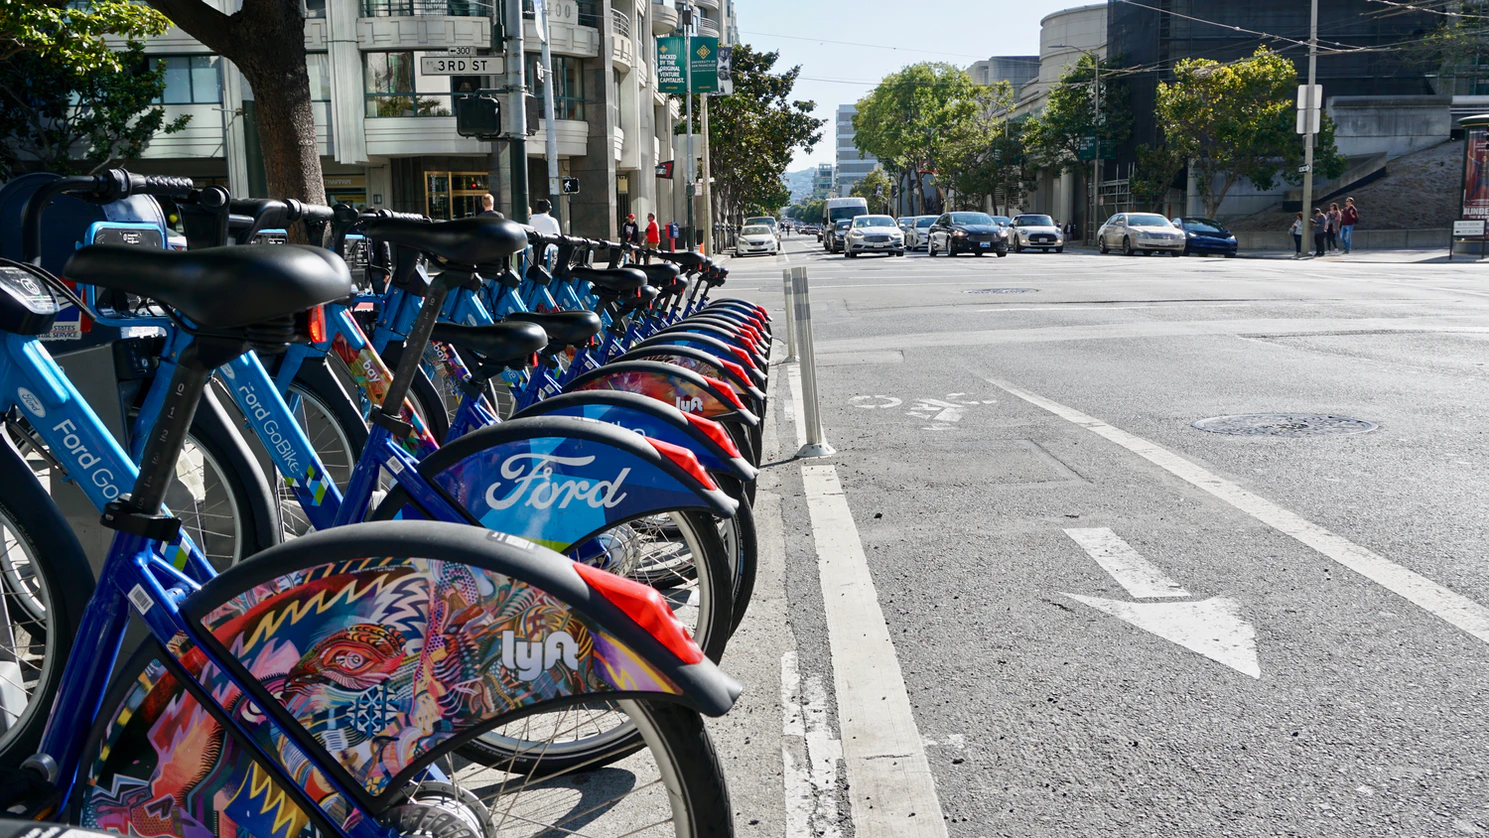




In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Bike_data_test = pd.read_csv(r'C:\Users\Adam\Desktop\Personal\Python Syntax\Python Input Files\bikeshare_testdata.csv', header=0)

Bike_data_train = pd.read_csv(r'C:\Users\Adam\Desktop\Personal\Python Syntax\Python Input Files\bikeshare_traindata.csv', header=0 , index_col='datetime', parse_dates=True).drop(['casual','registered'],axis=1)

Bike_data_train['hour']=Bike_data_train.index.hour

Bike_data_train['month']=Bike_data_train.index.month

X_df = Bike_data_train.drop('count',axis=1)

y_df = Bike_data_train['count']

#establishing the features
X = X_df.values
#establishing the labels
y = y_df.values.reshape(-1,)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

""" fitting a random forest """

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

# Fit rf to the training set            
forest_model = rf.fit(X_train, y_train)   

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_predforest = forest_model.predict(X_test)

# Evaluate the test set RMSE
rmse_testforest = MSE(y_test, y_predforest)**(1/2)

# Print rmse_test
print('Test set RMSE of random forest: {:.2f}'.format(rmse_testforest))

""" fitting a random forest """

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

tree_model = dt.fit(X_train, y_train) 

# Predict the test set labels
y_predtree = tree_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_predtree)**(1/2)
# Print rmse_test
print('Test set RMSE of single decision tree : {:.2f}'.format(rmse_test))

## Results

As can be seen aboVve the random forest ensemble far outperforms the single decision tree

# 4b. Random Forest Algorithm - identifying predicitivity of features

In the below code I'll determine which features were the most predictive according to the random forests regressor that I trained in the previous cell.

For this purpose, I'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

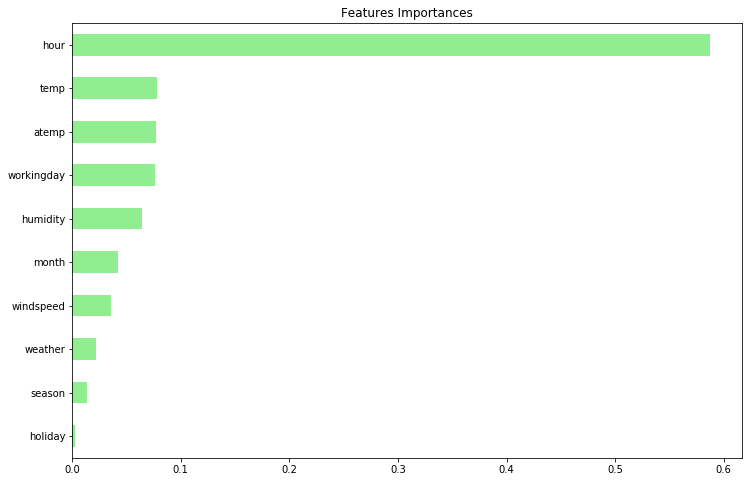

In [38]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_df.columns)

# Sort importances
importances_sorted = importances.sort_values()

""" apparently hour is by far the most predictive in terms of predicting the number of bike shares used """

fig8, ax = plt.subplots(figsize=(12,8))

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
ax.set_title('Features Importances')
plt.show()

## Result 

What we can see is that the hour of the day is by a far the most important feature in predicting bike share usage!

# 4c.) Random Forest Algorithm - hyper tuning an ensemble

Just like a base estimator can be hyper tuned so can an ensemble. 

What is hyper parameter tuning?

* Problem: search for a set of optimal hyperparameters for a learning algoritm

* Solution: find a set of optimal hyperparameters that results in an optimal model 

Optimal model: yields an optimal score

Score: in sklearn defaults to accuracy acore for classification and R^2 for regression

Cross validation is used to estimate the generalization performance

I would expect tuning the random forest classifier for optimal performance would result in increased predictive accuracy. Lets find out! We will contiune with the same bike sharing data for result comparison!

We will create a hyper parameter grid of parameters for the algorithmn to iterate through to find the most predictive arrangment. We can use the GridsearchCV function to do this. 

In [39]:
# Instantiate rf
rf = RandomForestRegressor(random_state=2)


# firstly we will set a regression forests paramters parmater grid 

# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [25, 100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 10, 30], 
             }

# next will will specify the grid search function

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score  , r2_score

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1,
                       )

rf_tuned_model = grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred_tunedrf = best_model.predict(X_test)

# Compute rmse_test
rmse_test_tunedrf = MSE(y_test, y_pred_tunedrf)**(1/2)


""" as you can see from the results the paramter tuned random forest is bteer than the individual random forest 
we fit previously 
"""

# Print rmse_test
print('Test RMSE of hyper tuned random forest: {:.3f}'.format(rmse_test_tunedrf) + '\n\n') 

print('below are the optimum parameters returned: ')

print(grid_rf.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.4min finished


Test RMSE of hyper tuned random forest: 67.672


below are the optimum parameters returned: 
{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}


## Result

As expected hyper tuning the random forest algorithm improved its RMSE from 68.79 to 67.672!